#Imprting Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Loading DataSet

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/portu_banking_final.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#Imformation about Data and Dep. Var

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [4]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#Checking Data

In [5]:
#They are not balanced. 0 is 91.13% and 1 is 8.87%
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

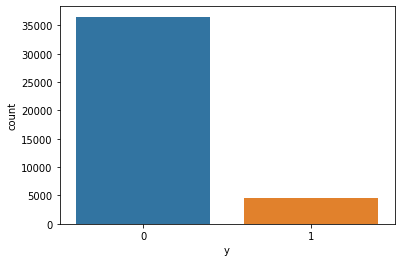

In [6]:
sns.countplot(x = 'y',data = data)

In [7]:
# d1 = data.copy()
# d2 = d1[d1.y == 1]
# d1 = pd.concat([d1,d2])
# d1 = pd.concat([d1,d2])
# d1 = pd.concat([d1,d2])
# d1 = pd.concat([d1,d2])
# d1 = pd.concat([d1,d2])
# d1 = pd.concat([d1,d2])
# d1 = pd.concat([d1,d2])

# data = d1

In [8]:
# sns.countplot(x = 'y', data = data)

In [9]:
# now the data set is balanced
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

#Changing Data Type abd cleaning Data

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [11]:
df = data.copy()

In [12]:
df['age']= pd.to_numeric(df['age'],errors= 'coerce',)

In [13]:
df['age'].isnull().sum()

13

In [14]:
df['age'] = df['age'].fillna(0)

In [15]:
df['age'] = df['age'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [17]:
df['age'].unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
        0, 25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82,
       77, 70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98,
       85, 83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [18]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

#Exploring Data


In [19]:
df.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.898791,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [20]:
df.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
ADMIN.,35.000000,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,47.000000,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,36.000000,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,36.000000,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,69.666667,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,37.333333,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,24.500000,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,37.000000,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,52.000000,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


In [21]:
df.job.value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [22]:
df = df.replace('ADMIN.','admin.')

In [23]:
df = df.replace('RETIRED','retired')

In [24]:
df = df.replace('SERVICES','services')

In [25]:
df = df.replace('STUDENT','student')

In [26]:
df = df.replace('MANAGEMENT','management')

In [27]:
df = df.replace('TECHNICIAN','technician')

In [28]:
df = df.replace('BLUE-COLLAR','blue-collar')

In [29]:
df = df.replace('HOUSEMAID','housemaid')

In [30]:
df = df.replace('UNKNOWN','unknown')

In [31]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [32]:
df.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [33]:
df = df.replace('M','married')
df = df.replace('D','divorced')
df = df.replace('S','single')

In [34]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

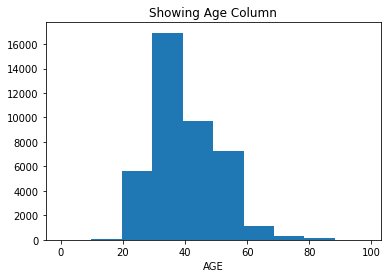

In [35]:
x = df['age']
plt.hist(x)
plt.title('Showing Age Column')
plt.xlabel("AGE")
plt.show()

30 to 40 age group peoples are the main audience for this "TERM DIPOSIT"

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

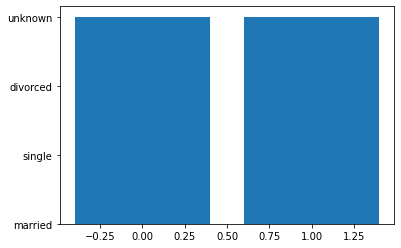

In [37]:
x = df['y']
# jo = df['job']
# mar = df['marital']

plt.bar(x,df['marital'])
# plt.bar(x,mar)
plt.show()

#Encoding Data

In [38]:
df['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [39]:
data_new=pd.get_dummies(df,columns=['job','marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])

In [40]:
data_new.shape

(41188, 67)

In [41]:
data_new.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 67, dtype: int64

In [42]:
data_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic-4y', 'education_basic-6y',
       'education_basic-9y', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'mo

#Spliting data for model

In [43]:
x = data_new.drop(['y'],axis = 1)
y = data_new['y']

In [44]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [45]:
mod = LogisticRegression(verbose= 1)
mod.fit(x_train , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(verbose=1)

In [46]:
pred = mod.predict(x_test)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.67      0.36      0.47       937

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.89      0.91      0.89      8238



In [48]:
print(accuracy_score(y_test,pred))

0.9075018208302986


#Balancing Data

In [49]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_X: (32950, 66)
Before OverSampling, the shape of train_y: (32950,) 



In [50]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=2)
x_train_n, y_train_n = sm.fit_resample(x_train, y_train.ravel())
x_test_n, y_test_n = sm.fit_resample(x_test, y_test.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_n.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_n.shape))

After OverSampling, the shape of train_X: (58494, 66)
After OverSampling, the shape of train_y: (58494,) 



In [51]:
x_train_n.shape

(58494, 66)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


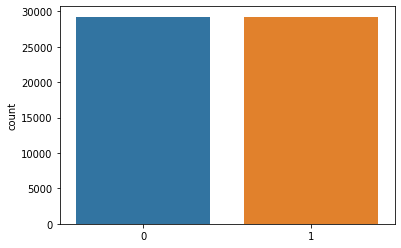

In [52]:
sns.countplot(y_train_n)

#Applying RFE/RFECV

In [53]:
# from sklearn.feature_selection import RFECV
# from sklearn.tree import DecisionTreeClassifier
# est = DecisionTreeClassifier()
# rfecv = RFECV(estimator=est, step=1,cv=4,verbose=0,n_jobs=-1)
# rfecv.fit(x_train_n, y_train_n)
# # train_z = rfecv.transform(x_train_n)
# print(rfecv.n_features_)
# rfecv.support_
# for feature in rfecv.support_.nonzero():
#   print("The imp features: ",x_train_n.columns[feature])


In [54]:
#len(train_z[0])


In [55]:
# x_train_n.shape

In [56]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
rfe = RFE(dt,n_features_to_select= 10)
rfe.fit(x_train_n, y_train_n)
rfe.support_

for feature in rfe.support_.nonzero():
  print("The 10 imp features of our data set: ",x_train_n.columns[feature])

The 10 imp features of our data set:  Index(['age', 'duration', 'campaign', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'contact_cellular', 'contact_telephone',
       'day_of_week_mon'],
      dtype='object')


In [57]:
new_view= pd.DataFrame({'Features ':list(x_train_n.columns),'Ranking':rfe.ranking_})
sort_new= new_view.sort_values(by= 'Ranking')
sort_new.head(15)
#print(new_view)

,Features,Ranking
0,age,1
46,contact_cellular,1
47,contact_telephone,1
59,day_of_week_mon,1
8,euribor3m,1
7,cons_conf_idx,1
9,nr_employed,1
2,campaign,1
1,duration,1
6,cons_price_idx,1


In [58]:
x_train_fe = rfe.transform(x_train_n)
x_test_fe  = rfe.transform(x_test_n)



#Re-Training Data


In [59]:
mod = LogisticRegression(verbose= 1)
mod_fit = mod.fit(x_train_fe, y_train_n)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


In [60]:
re_pred = mod.predict(x_test_fe)

#Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_n, re_pred)


array([[6192, 1109],
       [1034, 6267]])

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test_n, re_pred)

0.8539892348572596

In [63]:
print(accuracy_score(y_test_n,re_pred))

0.8532392822900973


#Classification Report

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
print(classification_report(y_test_n,re_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7301
           1       0.85      0.86      0.85      7301

    accuracy                           0.85     14602
   macro avg       0.85      0.85      0.85     14602
weighted avg       0.85      0.85      0.85     14602

